## SQL Data Wrangling

### SQL

#### Parch & Posey - SQL Case

Usaremos dados da Parch & Posey, uma empresa que vende papel. Ela tem 50 representantes de vendas espalhados pelos Estados Unidos em quatro regiões.

Ela vende três tipos de papel: normal, para pôsteres e brilhante. Seus clientes são principalmente as grandes empresas da Fortune 100, as quais atraem com publicidade no Google, Facebook e Twitter.

A Parch & Posey não é uma empresa real. Foi inventada, assim como os dados. As perguntas que você responderá usando os dados da Parch & Posey simulam problemas do mundo real.

Ao usar o SQL, poderemos ajudar a Parch & Posey a responder perguntas difíceis como:

* Qual das suas linhas de produto tem o pior desempenho?

* Qual dos seus canais de marketing deve fazer um investimento maior?



##### Entity Relationship Diagrams

An entity relationship diagram (ERD) is a common way to view data in a database. Below is the ERD for the database we will use from Parch & Posey. These diagrams help you visualize the data you are analyzing including:

* The names of the tables.
* The columns in each table.
* The way the tables work together.

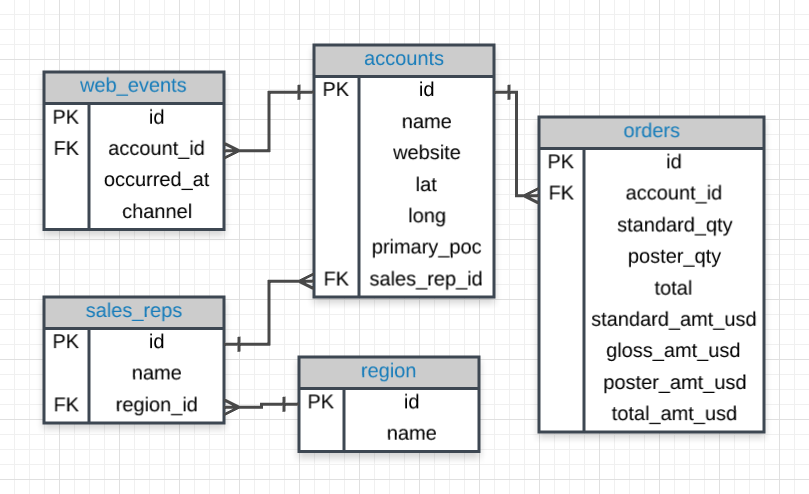

In the Parch & Posey database there are five tables (essentially 5 spreadsheets):

* web_events
* accounts
* orders
* sales_reps
* region

You can think of each of these tables as an individual spreadsheet. Then the columns in each spreadsheet are listed below the table name. For example, the region table has two columns: id and name. Alternatively the web_events table has four columns.

The "crow's foot" that connects the tables together shows us how the columns in one table relate to the columns in another table. In this first lesson, you will be learning the basics of how to work with SQL to interact with a single table. In the next lesson, you will learn more about why these connections are so important for working with SQL and relational databases.

##### Basic SQL Tasks

###### CONNECTION

In [ ]:
import sqlite3
import pandas as pd


# Connect ----------------------------------------------------------------

connection = sqlite3.connect("/content/parch-and-posey.db")
cursor = connection.cursor()
sql_file = open("/content/parch-and-posey.sql")
sql_as_string = sql_file.read()
cursor.executescript(sql_as_string)

###### SELECT FROM

Select all columns and all orders in the orders table

In [ ]:
pd.read_sql('''
            SELECT * 
            FROM orders
            ''', connection)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43
1,2,1001,2015-11-05 03:34:33,190,41,57,288,948.10,307.09,462.84,1718.03
2,3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.00,776.18
3,4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.00,958.24
4,5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49
...,...,...,...,...,...,...,...,...,...,...,...
6907,6908,4501,2016-06-29 04:03:39,11,199,59,269,54.89,1490.51,479.08,2024.48
6908,6909,4501,2016-07-29 19:58:32,5,91,96,192,24.95,681.59,779.52,1486.06
6909,6910,4501,2016-08-27 00:58:11,16,94,82,192,79.84,704.06,665.84,1449.74
6910,6911,4501,2016-11-22 06:52:22,63,67,81,211,314.37,501.83,657.72,1473.92


Select only the id, account_id, and occurred_at columns for all orders in the orders table

In [ ]:
pd.read_sql('''
            SELECT [id], [account_id], [occurred_at] 
            FROM [orders]
            ''', connection)

,id,account_id,occurred_at
0,1,1001,2015-10-06 17:31:14
1,2,1001,2015-11-05 03:34:33
2,3,1001,2015-12-04 04:21:55
3,4,1001,2016-01-02 01:18:24
4,5,1001,2016-02-01 19:27:27
...,...,...,...
6907,6908,4501,2016-06-29 04:03:39
6908,6909,4501,2016-07-29 19:58:32
6909,6910,4501,2016-08-27 00:58:11
6910,6911,4501,2016-11-22 06:52:22


###### LIMIT

Displays all the data in the occurred_at, account_id, and channel columns of the web_events table, and limits the output to only the first 15 rows

In [ ]:
pd.read_sql('''
            SELECT [occurred_at], [account_id], [channel] 
            FROM [web_events] 
            LIMIT 15
            ''', connection)

,occurred_at,account_id,channel
0,2015-10-06 17:13:58,1001,direct
1,2015-11-05 03:08:26,1001,direct
2,2015-12-04 03:57:24,1001,direct
3,2016-01-02 00:55:03,1001,direct
4,2016-02-01 19:02:33,1001,direct
5,2016-03-02 15:15:22,1001,direct
6,2016-04-01 10:58:55,1001,direct
7,2016-05-01 15:26:44,1001,direct
8,2016-05-31 20:53:47,1001,direct
9,2016-06-30 12:09:45,1001,direct


###### ORDER BY



Display the order ID, account ID, and total dollar amount for all the orders, sorted first by the account ID (in ascending order), and then by the total dollar amount (in descending order).

In [ ]:
pd.read_sql('''
            SELECT [id], [account_id], [total_amt_usd] 
            FROM [orders] 
            ORDER BY [account_id], [total_amt_usd] DESC 
            LIMIT 5
            ''', connection)

,id,account_id,total_amt_usd
0,4308,1001,9426.71
1,4309,1001,9230.67
2,4316,1001,9134.31
3,4317,1001,8963.91
4,4314,1001,8863.24


Display order ID, account ID, and total dollar amount for each order, but this time sorted first by total dollar amount (in descending order), and then by account ID (in ascending order).

In [ ]:
pd.read_sql('''
            SELECT [id], [account_id], [total_amt_usd] 
            FROM [orders] 
            ORDER BY [total_amt_usd] DESC, [account_id]
            ''', connection)

,id,account_id,total_amt_usd
0,4016,4251,232207.07
1,3892,4161,112875.18
2,3963,4211,107533.55
3,5791,2861,95005.82
4,3778,4101,93547.84
...,...,...,...
6907,6323,3551,0.00
6908,6375,3651,0.00
6909,6435,3801,0.00
6910,6523,3991,0.00


###### WHERE

Pulls the first 5 rows and all columns from the orders table that have a dollar amount of gloss_amt_usd greater than or equal to 1000.

In [ ]:
pd.read_sql('''
            SELECT * 
            FROM orders 
            WHERE gloss_amt_usd >= 1000 
            LIMIT 5
            ''', connection)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,14,1001,2016-10-26 20:31:30,97,143,54,294,484.03,1071.07,438.48,1993.58
1,62,1091,2014-10-13 12:12:55,146,196,3,345,728.54,1468.04,24.36,2220.94
2,88,1101,2015-06-24 13:08:15,182,339,17,538,908.18,2539.11,138.04,3585.33
3,121,1131,2016-08-10 23:47:41,273,134,0,407,1362.27,1003.66,0.00,2365.93
4,129,1141,2016-12-21 15:52:58,143,1045,2157,3345,713.57,7827.05,17514.84,26055.46


Filter the accounts table to include the company name, website, and the primary point of contact (primary_poc) just for the Exxon Mobil company in the accounts table.

In [ ]:
pd.read_sql('''
            SELECT [name], [website], [primary_poc] 
            FROM [accounts] 
            WHERE name = "Exxon Mobil" 
            ''', connection)

,name,website,primary_poc
0,Exxon Mobil,www.exxonmobil.com,Sung Shields


###### ARITHMETIC/AS

Create a column that divides the standard_amt_usd by the standard_qty to find the unit price for standard paper for each order. Limit the results to the first 10 orders, and include the id and account_id fields.

In [ ]:
pd.read_sql('''
            SELECT id, (standard_amt_usd/total_amt_usd)*100 AS std_percent, total_amt_usd 
            FROM orders 
            LIMIT 5
            ''', connection)

,id,std_percent,total_amt_usd
0,1,63.052300,973.43
1,2,55.185299,1718.03
2,3,54.645830,776.18
3,4,74.987477,958.24
4,5,54.796693,983.49


###### LIKE

All the companies whose names start with 'C'.

In [ ]:
pd.read_sql('''
            SELECT name 
            FROM accounts 
            WHERE name LIKE "C%"
            ''', connection)

,name
0,CVS Health
1,Chevron
2,Costco
3,Cardinal Health
4,Citigroup
5,Comcast
6,Cisco Systems
7,Caterpillar
8,Coca-Cola
9,Cigna


All companies whose names contain the string 'one' somewhere in the name.

In [ ]:
pd.read_sql('''
            SELECT name 
            FROM accounts 
            WHERE name LIKE "%one%"
            ''', connection)

,name
0,Honeywell International
1,INTL FCStone
2,Capital One Financial
3,AutoZone
4,Oneok


All companies whose names end with 's'.

In [ ]:
pd.read_sql('''
            SELECT name 
            FROM accounts 
            WHERE name LIKE "%s"
            ''', connection)

,name
0,General Motors
1,United Technologies
2,Lowe's
3,UPS
4,Cisco Systems
...,...
76,United Natural Foods
77,Dean Foods
78,Mohawk Industries
79,Franklin Resources


###### IN

Use the accounts table to find the account name, primary_poc, and sales_rep_id for Walmart, Target, and Nordstrom.

In [ ]:
pd.read_sql('''
            SELECT name, primary_poc, sales_rep_id 
            FROM accounts 
            WHERE name IN ("Walmart", "Target", "Nordstrom")
            ''', connection)

,name,primary_poc,sales_rep_id
0,Walmart,Tamara Tuma,321500
1,Target,Luba Streett,321660
2,Nordstrom,Yan Crater,321820


Use the web_events table to find all information regarding individuals who were contacted via the channel of organic or adwords.

In [ ]:
pd.read_sql('''
            SELECT * 
            FROM web_events 
            WHERE channel IN ("organic", "adwords")
            ''', connection)

,id,account_id,occurred_at,channel
0,4395,1001,2015-10-22 05:02:47,organic
1,4396,1001,2015-10-22 14:04:20,adwords
2,4399,1001,2016-01-01 15:45:54,adwords
3,4401,1001,2016-02-07 17:44:10,adwords
4,4402,1001,2016-02-27 15:27:22,organic
...,...,...,...,...
1853,9064,4491,2016-05-06 05:03:27,adwords
1854,9065,4491,2016-06-17 19:43:12,adwords
1855,9071,4491,2016-11-06 07:23:45,organic
1856,9072,4491,2016-12-18 03:21:31,organic


###### NOT

Use the accounts table to find the account name, primary poc, and sales rep id for all stores except Walmart, Target, and Nordstrom.

In [ ]:
pd.read_sql('''
            SELECT name, primary_poc, sales_rep_id 
            FROM accounts 
            WHERE name NOT IN ("Walmart", "Target", "Nordstrom")
            ''', connection)

,name,primary_poc,sales_rep_id
0,Exxon Mobil,Sung Shields,321510
1,Apple,Jodee Lupo,321520
2,Berkshire Hathaway,Serafina Banda,321530
3,McKesson,Angeles Crusoe,321540
4,UnitedHealth Group,Savanna Gayman,321550
...,...,...,...
343,KKR,Buffy Azure,321970
344,Oneok,Esta Engelhardt,321960
345,Newmont Mining,Khadijah Riemann,321970
346,PPL,Deanne Hertlein,321960


All the companies whose names do not start with 'C'.

In [ ]:
pd.read_sql('''
            SELECT name 
            FROM accounts WHERE name NOT LIKE "C%"
            ''', connection)

,name
0,Walmart
1,Exxon Mobil
2,Apple
3,Berkshire Hathaway
4,McKesson
...,...
309,KKR
310,Oneok
311,Newmont Mining
312,PPL


###### AND

Write a query that returns all the orders where the standard_qty is over 1000, the poster_qty is 0, and the gloss_qty is 0.

In [ ]:
pd.read_sql('''
            SELECT * 
            FROM orders 
            WHERE standard_qty > 1000 AND poster_qty = 0 AND gloss_qty = 0
            ''', connection)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,2613,2951,2016-08-15 00:06:12,1171,0,0,1171,5843.29,0,0,5843.29
1,3260,3491,2014-08-29 22:43:00,1552,0,0,1552,7744.48,0,0,7744.48


###### BETWEEN

Display the order date and gloss_qty data for all orders where gloss_qty is between 24 and 29. Then look at your output to see if the BETWEEN operator included the begin and end values or not.

In [ ]:
pd.read_sql('''
            SELECT occurred_at, gloss_qty 
            FROM orders 
            WHERE gloss_qty BETWEEN 24 AND 29
            ''', connection)

,occurred_at,gloss_qty
0,2016-02-01 19:27:27,29
1,2016-03-02 15:29:32,24
2,2016-10-14 23:54:21,28
3,2015-08-09 18:29:20,24
4,2016-02-01 20:00:37,26
...,...,...
479,2016-07-23 14:32:34,24
480,2014-06-26 04:12:30,24
481,2014-03-08 15:33:55,25
482,2014-03-09 07:21:16,27


###### OR

Write a query that returns a list of orders where the standard_qty is zero and either the gloss_qty or poster_qty is over 1000.

In [ ]:
pd.read_sql('''
            SELECT * 
            FROM orders 
            WHERE standard_qty = 0 AND (gloss_qty > 1000 OR poster_qty > 1000)
            ''', connection)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
0,1913,2461,2013-12-29 09:50:38,0,6450,45,6495,0,48310.50,365.40,48675.90
1,4369,1111,2015-11-15 17:47:46,0,486,2988,3474,0,3640.14,24262.56,27902.70
2,4391,1161,2016-06-04 08:58:10,0,106,2967,3073,0,793.94,24092.04,24885.98
3,4420,1191,2016-05-21 23:21:14,0,43,1448,1491,0,322.07,11757.76,12079.83
4,4448,1231,2016-06-25 12:27:15,0,3178,23,3201,0,23803.22,186.76,23989.98
5,4698,1451,2015-02-26 06:13:21,0,484,4901,5385,0,3625.16,39796.12,43421.28
6,4942,1701,2015-09-24 21:02:25,0,10744,95,10839,0,80472.56,771.40,81243.96
7,5032,1831,2016-05-26 17:48:19,0,1448,287,1735,0,10845.52,2330.44,13175.96
8,5191,2051,2015-05-17 14:17:59,0,1041,0,1041,0,7797.09,0.00,7797.09
9,5791,2861,2014-10-24 12:06:22,0,10,11691,11701,0,74.90,94930.92,95005.82


###### Summary

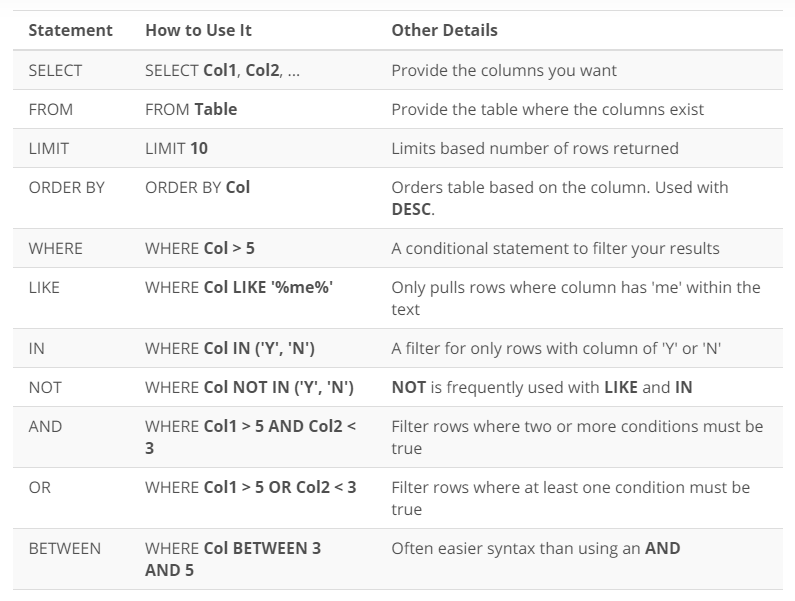

##### SQL Joins

###### Inner Join

In [ ]:
pd.read_sql('''
            SELECT orders.*, accounts.* 
            FROM orders 
            JOIN accounts ON orders.account_id = accounts.id;
            ''', connection)

,id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,id,name,website,lat,long,primary_poc,sales_rep_id
0,1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
1,2,1001,2015-11-05 03:34:33,190,41,57,288,948.10,307.09,462.84,1718.03,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
2,3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0.00,776.18,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
3,4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0.00,958.24,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
4,5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49,1001,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,321500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,6908,4501,2016-06-29 04:03:39,11,199,59,269,54.89,1490.51,479.08,2024.48,4501,SpartanNash,www.spartannash.com,45.555651,-122.657145,Jewell Likes,321970
6908,6909,4501,2016-07-29 19:58:32,5,91,96,192,24.95,681.59,779.52,1486.06,4501,SpartanNash,www.spartannash.com,45.555651,-122.657145,Jewell Likes,321970
6909,6910,4501,2016-08-27 00:58:11,16,94,82,192,79.84,704.06,665.84,1449.74,4501,SpartanNash,www.spartannash.com,45.555651,-122.657145,Jewell Likes,321970
6910,6911,4501,2016-11-22 06:52:22,63,67,81,211,314.37,501.83,657.72,1473.92,4501,SpartanNash,www.spartannash.com,45.555651,-122.657145,Jewell Likes,321970


In [ ]:
pd.read_sql('''
            SELECT orders.standard_qty, orders.gloss_qty, orders.poster_qty, accounts.website, accounts.primary_poc 
            FROM orders 
            JOIN accounts ON orders.account_id = accounts.id
            ''', connection)

,standard_qty,gloss_qty,poster_qty,website,primary_poc
0,123,22,24,www.walmart.com,Tamara Tuma
1,190,41,57,www.walmart.com,Tamara Tuma
2,85,47,0,www.walmart.com,Tamara Tuma
3,144,32,0,www.walmart.com,Tamara Tuma
4,108,29,28,www.walmart.com,Tamara Tuma
...,...,...,...,...,...
6907,11,199,59,www.spartannash.com,Jewell Likes
6908,5,91,96,www.spartannash.com,Jewell Likes
6909,16,94,82,www.spartannash.com,Jewell Likes
6910,63,67,81,www.spartannash.com,Jewell Likes


In [ ]:
pd.read_sql('''
            SELECT web_events.channel, accounts.name, orders.total 
            FROM web_events 
            JOIN accounts ON web_events.account_id = accounts.id 
            JOIN orders ON accounts.id = orders.account_id
            ''', connection)

,channel,name,total
0,direct,Walmart,129
1,direct,Walmart,132
2,direct,Walmart,137
3,direct,Walmart,148
4,direct,Walmart,158
...,...,...,...
321478,organic,SpartanNash,211
321479,organic,SpartanNash,215
321480,organic,SpartanNash,224
321481,organic,SpartanNash,263


Business Questions

Provide a table for all the for all web_events associated with account name of Walmart. There should be three columns. Be sure to include the primary_poc, time of the event, and the channel for each event. Additionally, you might choose to add a fourth column to assure only Walmart events were chosen.

In [ ]:
pd.read_sql('''
            SELECT a.primary_poc, w.occurred_at, w.channel, a.name
            FROM web_events w
            JOIN accounts a
            ON w.account_id = a.id
            WHERE a.name = 'Walmart';
            ''', connection)

,primary_poc,occurred_at,channel,name
0,Tamara Tuma,2015-10-06 04:22:11,facebook,Walmart
1,Tamara Tuma,2015-10-06 17:13:58,direct,Walmart
2,Tamara Tuma,2015-10-22 05:02:47,organic,Walmart
3,Tamara Tuma,2015-10-22 14:04:20,adwords,Walmart
4,Tamara Tuma,2015-11-05 03:08:26,direct,Walmart
5,Tamara Tuma,2015-11-05 17:18:54,direct,Walmart
6,Tamara Tuma,2015-12-04 03:57:24,direct,Walmart
7,Tamara Tuma,2015-12-11 08:44:16,direct,Walmart
8,Tamara Tuma,2016-01-01 15:45:54,adwords,Walmart
9,Tamara Tuma,2016-01-02 00:55:03,direct,Walmart


Provide a table that provides the region for each sales_rep along with their associated accounts. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.

In [ ]:
pd.read_sql('''
            SELECT r.name region, s.name rep, a.name account
            FROM sales_reps s
            JOIN region r
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            ORDER BY a.name;
            ''', connection)

,region,rep,account
0,Northeast,Sibyl Lauria,3M
1,Southeast,Earlie Schleusner,ADP
2,Southeast,Moon Torian,AECOM
3,Southeast,Calvin Ollison,AES
4,Northeast,Elba Felder,AIG
...,...,...,...
346,Northeast,Necole Victory,World Fuel Services
347,West,Maryanna Fiorentino,Xcel Energy
348,Midwest,Cliff Meints,Xerox
349,Southeast,Maren Musto,Yum Brands


Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. Your final table should have 3 columns: region name, account name, and unit price. A few accounts have 0 for total, so I divided by (total + 0.01) to assure not dividing by zero.

In [ ]:
pd.read_sql('''
            SELECT r.name region, a.name account, 
                o.total_amt_usd/(o.total + 0.01) unit_price
            FROM region r
            JOIN sales_reps s
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            JOIN orders o
            ON o.account_id = a.id;
            ''', connection)

,region,account,unit_price
0,Northeast,Walmart,5.833424
1,Northeast,Walmart,5.879706
2,Northeast,Walmart,5.646522
3,Northeast,Walmart,5.935815
4,Northeast,Walmart,6.019492
...,...,...,...
6907,West,Pacific Life,5.231985
6908,West,Pacific Life,5.048424
6909,West,Pacific Life,5.136665
6910,West,Pacific Life,8.063023


###### Other Joins

Only the examples, no database associated.

Left Join

LEFT JOIN - pulls all the data that exists in both tables, as well as all of the rows from the table in the FROM even if they do not exist in the JOIN statement

In [ ]:
SELECT c.countryid, c.countryName, s.stateName
FROM Country c
LEFT JOIN State s
ON c.countryid = s.countryid;

Right Join

RIGHT JOIN - pulls all the data that exists in both tables, as well as all of the rows from the table in the JOIN even if they do not exist in the FROM statement.

In [ ]:
SELECT c.countryid, c.countryName, s.stateName
FROM State s
RIGHT JOIN Country c
ON c.countryid = s.countryid;

Full Outer Join

The FULL OUTER JOIN keyword returns all records when there is a match in left (table1) or right (table2) table records.

In [ ]:
SELECT Customers.CustomerName, Orders.OrderID
FROM Customers
FULL OUTER JOIN Orders ON Customers.CustomerID=Orders.CustomerID
ORDER BY Customers.CustomerName;

Union

The UNION operator is used to combine the result-set of two or more SELECT statements.

Every SELECT statement within UNION must have the same number of columns
The columns must also have similar data types
The columns in every SELECT statement must also be in the same order

In [ ]:
SELECT City FROM Customers
UNION
SELECT City FROM Suppliers
ORDER BY City;

Cross Join

The SQL CROSS JOIN produces a result set which is the number of rows in the first table multiplied by the number of rows in the second table if no WHERE clause is used along with CROSS JOIN.This kind of result is called as Cartesian Product.

In [ ]:
SELECT foods.item_name,foods.item_unit,
company.company_name,company.company_city 
FROM foods 
CROSS JOIN company;

Business Questions

Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.

In [ ]:
pd.read_sql('''
            SELECT r.name region, s.name rep, a.name account
            FROM sales_reps s
            JOIN region r
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            WHERE r.name = 'Midwest'
            ORDER BY a.name;
            ''', connection)

,region,rep,account
0,Midwest,Julie Starr,AbbVie
1,Midwest,Chau Rowles,Abbott Laboratories
2,Midwest,Cliff Meints,Aflac
3,Midwest,Chau Rowles,Alcoa
4,Midwest,Charles Bidwell,Altria Group
5,Midwest,Delilah Krum,Amgen
6,Midwest,Charles Bidwell,Arrow Electronics
7,Midwest,Delilah Krum,AutoNation
8,Midwest,Delilah Krum,Capital One Financial
9,Midwest,Cordell Rieder,Centene


Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a first name starting with S and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.

In [ ]:
pd.read_sql('''
            SELECT r.name region, s.name rep, a.name account
            FROM sales_reps s
            JOIN region r
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            WHERE r.name = 'Midwest' AND s.name LIKE 'S%'
            ORDER BY a.name;
            ''', connection)

,region,rep,account
0,Midwest,Sherlene Wetherington,Community Health Systems
1,Midwest,Sherlene Wetherington,Progressive
2,Midwest,Sherlene Wetherington,Rite Aid
3,Midwest,Sherlene Wetherington,Time Warner Cable
4,Midwest,Sherlene Wetherington,U.S. Bancorp


Provide a table that provides the region for each sales_rep along with their associated accounts. This time only for accounts where the sales rep has a last name starting with K and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name.

In [ ]:
pd.read_sql('''
            SELECT r.name region, s.name rep, a.name account
            FROM sales_reps s
            JOIN region r
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            WHERE r.name = 'Midwest' AND s.name LIKE '% K%'
            ORDER BY a.name;
            ''', connection)

,region,rep,account
0,Midwest,Delilah Krum,Amgen
1,Midwest,Delilah Krum,AutoNation
2,Midwest,Delilah Krum,Capital One Financial
3,Midwest,Delilah Krum,Cummins
4,Midwest,Carletta Kosinski,Danaher
5,Midwest,Carletta Kosinski,Dollar General
6,Midwest,Delilah Krum,Hartford Financial Services Group
7,Midwest,Carletta Kosinski,International Paper
8,Midwest,Delilah Krum,Kimberly-Clark
9,Midwest,Carletta Kosinski,McDonald's


Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100. Your final table should have 3 columns: region name, account name, and unit price.


In [ ]:
pd.read_sql('''
            SELECT r.name region, a.name account, o.total_amt_usd/(o.total + 0.01) unit_price
            FROM region r
            JOIN sales_reps s
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            JOIN orders o
            ON o.account_id = a.id
            WHERE o.standard_qty > 100;
            ''', connection)

,region,account,unit_price
0,Northeast,Walmart,5.759600
1,Northeast,Walmart,5.965175
2,Northeast,Walmart,5.444236
3,Northeast,Walmart,5.960184
4,Northeast,Walmart,6.168719
...,...,...,...
4504,West,KKR,7.467654
4505,West,KKR,7.265387
4506,West,KKR,7.082861
4507,West,PPL,6.565007


Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100 and the poster order quantity exceeds 50. Your final table should have 3 columns: region name, account name, and unit price. Sort for the smallest unit price first.

In [ ]:
pd.read_sql('''
            SELECT r.name region, a.name account, o.total_amt_usd/(o.total + 0.01) unit_price
            FROM region r
            JOIN sales_reps s
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            JOIN orders o
            ON o.account_id = a.id
            WHERE o.standard_qty > 100 AND o.poster_qty > 50
            ORDER BY unit_price;
            ''', connection)

,region,account,unit_price
0,Northeast,State Farm Insurance Cos.,5.119282
1,Southeast,DISH Network,5.231816
2,Northeast,Travelers Cos.,5.235181
3,Northeast,Best Buy,5.260426
4,West,Stanley Black & Decker,5.266396
...,...,...,...
830,West,Fidelity National Financial,7.992802
831,Northeast,CHS,8.018849
832,West,Pacific Life,8.063023
833,West,Mosaic,8.066329


Provide the name for each region for every order, as well as the account name and the unit price they paid (total_amt_usd/total) for the order. However, you should only provide the results if the standard order quantity exceeds 100 and the poster order quantity exceeds 50. Your final table should have 3 columns: region name, account name, and unit price. Sort for the largest unit price first.

In [ ]:
pd.read_sql('''
            SELECT r.name region, a.name account, o.total_amt_usd/(o.total + 0.01) unit_price
            FROM region r
            JOIN sales_reps s
            ON s.region_id = r.id
            JOIN accounts a
            ON a.sales_rep_id = s.id
            JOIN orders o
            ON o.account_id = a.id
            WHERE o.standard_qty > 100 AND o.poster_qty > 50
            ORDER BY unit_price DESC;
            ''', connection)

,region,account,unit_price
0,Northeast,IBM,8.089906
1,West,Mosaic,8.066329
2,West,Pacific Life,8.063023
3,Northeast,CHS,8.018849
4,West,Fidelity National Financial,7.992802
...,...,...,...
830,West,Stanley Black & Decker,5.266396
831,Northeast,Best Buy,5.260426
832,Northeast,Travelers Cos.,5.235181
833,Southeast,DISH Network,5.231816


What are the different channels used by account id 1001? Your final table should have only 2 columns: account name and the different channels. You can try SELECT DISTINCT to narrow down the results to only the unique values.

In [ ]:
pd.read_sql('''
            SELECT DISTINCT a.name, w.channel
            FROM accounts a
            JOIN web_events w
            ON a.id = w.account_id
            WHERE a.id = '1001';
            ''', connection)

,name,channel
0,Walmart,adwords
1,Walmart,banner
2,Walmart,direct
3,Walmart,facebook
4,Walmart,organic
5,Walmart,twitter


Find all the orders that occurred in 2015. Your final table should have 4 columns: occurred_at, account name, order total, and order total_amt_usd.

In [ ]:
pd.read_sql('''
            SELECT o.occurred_at, a.name, o.total, o.total_amt_usd
            FROM accounts a
            JOIN orders o
            ON o.account_id = a.id
            WHERE o.occurred_at BETWEEN '01/01/2015' AND '01/01/2016'
            ORDER BY o.occurred_at DESC;
            ''', connection)

,occurred_at,name,total,total_amt_usd


##### PostgreSQL Connection

In [ ]:
!python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org --trusted-host pypi.python.org psycopg2

Arguments required to connect PostgreSQL database from Python

You need to know the following detail of the PostgreSQL server to perform the connection.

* Username: The username you use to work with PostgreSQL, The default username for the PostgreSQL database is Postgres.
* Password: Password is given by the user at the time of installing the PostgreSQL.
* Host Name: This is the server name or Ip address on which PostgreSQL is running. if you are running on localhost, then you can use localhost, or its IP, i.e., 127.0.0.0
* Database Name: Database name to which you want to connect. Here we are using Database named “postgres_db“.

In [ ]:
import psycopg2
from psycopg2 import Error

try:
    # Connect to an existing database
    connection = psycopg2.connect(user="postgres",
                                  password="pynative@#29",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="parch-and-posey.db")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    # Print PostgreSQL details
    print("PostgreSQL server information")
    print(connection.get_dsn_parameters(), "\n")
    # Executing a SQL query
    cursor.execute("SELECT version();")
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
finally:
    if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

Error while connecting to PostgreSQL could not connect to server: Connection refused
	Is the server running on host "localhost" (127.0.0.1) and accepting
	TCP/IP connections on port 5432?
could not connect to server: Cannot assign requested address
	Is the server running on host "localhost" (::1) and accepting
	TCP/IP connections on port 5432?



ProgrammingError: ignored

##### SQL Aggregations

###### COUNT

Count the Number of Rows in a Table (Accounts in the database)

In [ ]:
pd.read_sql('SELECT COUNT(*) AS account_count FROM accounts', connection)

,account_count
0,351


Count the Number of Values different of Null in a Table Column



In [ ]:
pd.read_sql('SELECT COUNT(accounts.sales_rep_id) AS account_sales_rep_id_count FROM accounts', connection)

,account_sales_rep_id_count
0,351


There is no account without a sales_rep_id registered

###### SUM

Find the total amount of poster_qty paper ordered in the orders table.

In [ ]:
pd.read_sql('SELECT SUM(poster_qty) AS total_poster_sales FROM orders', connection)

,total_poster_sales
0,723646


Find the total amount of standard_qty paper ordered in the orders table.

In [ ]:
SELECT SUM(standard_qty) AS total_standard_sales
FROM orders;

Find the total dollar amount of sales using the total_amt_usd in the orders table.

In [ ]:
SELECT SUM(total_amt_usd) AS total_dollar_sales
FROM orders;

Find the total amount spent on standard_amt_usd and gloss_amt_usd paper for each order in the orders table. This should give a dollar amount for each order in the table.

In [ ]:
SELECT standard_amt_usd + gloss_amt_usd AS total_standard_gloss
FROM orders;

Find the standard_amt_usd per unit of standard_qty paper. Your solution should use both an aggregation and a mathematical operator.

In [ ]:
SELECT SUM(standard_amt_usd)/SUM(standard_qty) AS standard_price_per_unit
FROM orders;

###### MIN, MAX, AVG

When was the earliest order ever placed? You only need to return the date.

In [ ]:
SELECT MIN(occurred_at) 
FROM orders;

Try performing the same query as in question 1 without using an aggregation function.

In [ ]:
SELECT occurred_at 
FROM orders 
ORDER BY occurred_at
LIMIT 1;

When did the most recent (latest) web_event occur?


In [ ]:
SELECT MAX(occurred_at)
FROM web_events;

Try to perform the result of the previous query without using an aggregation function.

In [ ]:
SELECT occurred_at
FROM web_events
ORDER BY occurred_at DESC
LIMIT 1;

Find the mean (AVERAGE) amount spent per order on each paper type, as well as the mean amount of each paper type purchased per order. Your final answer should have 6 values - one for each paper type for the average number of sales, as well as the average amount.

In [ ]:
SELECT AVG(standard_qty) mean_standard, AVG(gloss_qty) mean_gloss, 
           AVG(poster_qty) mean_poster, AVG(standard_amt_usd) mean_standard_usd, 
           AVG(gloss_amt_usd) mean_gloss_usd, AVG(poster_amt_usd) mean_poster_usd
FROM orders;

###### GROUP BY

The key takeaways here:

* GROUP BY can be used to aggregate data within subsets of the data. For example, grouping for different accounts, different regions, or different sales representatives.


* Any column in the SELECT statement that is not within an aggregator must be in the GROUP BY clause.


* The GROUP BY always goes between WHERE and ORDER BY.


* ORDER BY works like SORT in spreadsheet software.

Which account (by name) placed the earliest order? Your solution should have the account name and the date of the order.

In [ ]:
SELECT a.name, o.occurred_at
FROM accounts a
JOIN orders o
ON a.id = o.account_id
ORDER BY occurred_at
LIMIT 1;

Find the total sales in usd for each account. You should include two columns - the total sales for each company's orders in usd and the company name.

In [ ]:
SELECT a.name, SUM(total_amt_usd) total_sales
FROM orders o
JOIN accounts a
ON a.id = o.account_id
GROUP BY a.name;

Via what channel did the most recent (latest) web_event occur, which account was associated with this web_event? Your query should return only three values - the date, channel, and account name.

In [ ]:
SELECT w.occurred_at, w.channel, a.name
FROM web_events w
JOIN accounts a
ON w.account_id = a.id 
ORDER BY w.occurred_at DESC
LIMIT 1;

Find the total number of times each type of channel from the web_events was used. Your final table should have two columns - the channel and the number of times the channel was used.

In [ ]:
SELECT w.channel, COUNT(*)
FROM web_events w
GROUP BY w.channel;

Who was the primary contact associated with the earliest web_event?


In [ ]:
SELECT a.primary_poc
FROM web_events w
JOIN accounts a
ON a.id = w.account_id
ORDER BY w.occurred_at
LIMIT 1;

What was the smallest order placed by each account in terms of total usd. Provide only two columns - the account name and the total usd. Order from smallest dollar amounts to largest.

In [ ]:
SELECT a.name, MIN(total_amt_usd) smallest_order
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name
ORDER BY smallest_order;

Find the number of sales reps in each region. Your final table should have two columns - the region and the number of sales_reps. Order from fewest reps to most reps.

In [ ]:
SELECT r.name, COUNT(*) num_reps
FROM region r
JOIN sales_reps s
ON r.id = s.region_id
GROUP BY r.name
ORDER BY num_reps;

Key takeaways:

You can GROUP BY multiple columns at once, as we showed here. This is often useful to aggregate across a number of different segments.

The order of columns listed in the ORDER BY clause does make a difference. You are ordering the columns from left to right.

For each account, determine the average amount of each type of paper they purchased across their orders. Your result should have four columns - one for the account name and one for the average quantity purchased for each of the paper types for each account.

In [ ]:
SELECT a.name, AVG(o.standard_qty) avg_stand, AVG(o.gloss_qty) avg_gloss, AVG(o.poster_qty) avg_post
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name;

For each account, determine the average amount spent per order on each paper type. Your result should have four columns - one for the account name and one for the average amount spent on each paper type.

In [ ]:
SELECT a.name, AVG(o.standard_amt_usd) avg_stand, AVG(o.gloss_amt_usd) avg_gloss, AVG(o.poster_amt_usd) avg_post
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.name;

Determine the number of times a particular channel was used in the web_events table for each sales rep. Your final table should have three columns - the name of the sales rep, the channel, and the number of occurrences. Order your table with the highest number of occurrences first.

In [ ]:
SELECT s.name, w.channel, COUNT(*) num_events
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name, w.channel
ORDER BY num_events DESC;

Determine the number of times a particular channel was used in the web_events table for each region. Your final table should have three columns - the region name, the channel, and the number of occurrences. Order your table with the highest number of occurrences first.

In [ ]:
SELECT r.name, w.channel, COUNT(*) num_events
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
JOIN sales_reps s
ON s.id = a.sales_rep_id
JOIN region r
ON r.id = s.region_id
GROUP BY r.name, w.channel
ORDER BY num_events DESC;

###### DISTINCT

Use DISTINCT to test if there are any accounts associated with more than one region.

In [ ]:
SELECT a.id as "account id", r.id as "region id", 
a.name as "account name", r.name as "region name"
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
JOIN region r
ON r.id = s.region_id;

In [ ]:
SELECT DISTINCT id, name
FROM accounts;

The above two queries have the same number of resulting rows (351), so we know that every account is associated with only one region. If each account was associated with more than one region, the first query should have returned more rows than the second query.

Have any sales reps worked on more than one account?

In [ ]:
SELECT s.id, s.name, COUNT(*) num_accounts
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.id, s.name
ORDER BY num_accounts;

In [ ]:
SELECT DISTINCT id, name
FROM sales_reps;

Actually all of the sales reps have worked on more than one account. The fewest number of accounts any sales rep works on is 3. There are 50 sales reps, and they all have more than one account. Using DISTINCT in the second query assures that all of the sales reps are accounted for in the first query.

###### HAVING

HAVING is the “clean” way to filter a query that has been aggregated, but this is also commonly done using a subquery. Essentially, any time you want to perform a WHERE on an element of your query that was created by an aggregate, you need to use HAVING instead.

How many of the sales reps have more than 5 accounts that they manage?

In [ ]:
SELECT s.id, s.name, COUNT(*) num_accounts
FROM accounts a
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.id, s.name
HAVING COUNT(*) > 5
ORDER BY num_accounts;

We can get this using a SUBQUERY as shown below.

In [ ]:
SELECT COUNT(*) num_reps_above5
FROM(SELECT s.id, s.name, COUNT(*) num_accounts
     FROM accounts a
     JOIN sales_reps s
     ON s.id = a.sales_rep_id
     GROUP BY s.id, s.name
     HAVING COUNT(*) > 5
     ORDER BY num_accounts) AS Table1;

How many accounts have more than 20 orders?

In [ ]:
SELECT a.id, a.name, COUNT(*) num_orders
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING COUNT(*) > 20
ORDER BY num_orders;

Which account has the most orders?

In [ ]:
SELECT a.id, a.name, COUNT(*) num_orders
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY num_orders DESC
LIMIT 1;

How many accounts spent more than 30,000 usd total across all orders?

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING SUM(o.total_amt_usd) > 30000
ORDER BY total_spent;

How many accounts spent less than 1,000 usd total across all orders?

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
HAVING SUM(o.total_amt_usd) < 1000
ORDER BY total_spent;

Which account has spent the most with us?

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY total_spent DESC
LIMIT 1;

Which account has spent the least with us?

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) total_spent
FROM accounts a
JOIN orders o
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY total_spent
LIMIT 1;

Which accounts used facebook as a channel to contact customers more than 6 times?

In [ ]:
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
GROUP BY a.id, a.name, w.channel
HAVING COUNT(*) > 6 AND w.channel = 'facebook'
ORDER BY use_of_channel;

Which account used facebook most as a channel?

In [ ]:
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
WHERE w.channel = 'facebook'
GROUP BY a.id, a.name, w.channel
ORDER BY use_of_channel DESC
LIMIT 1;

Note: This query above only works if there are no ties for the account that used facebook the most. It is a best practice to use a larger limit number first such as 3 or 5 to see if there are ties before using LIMIT 1

Which channel was most frequently used by most accounts?

In [ ]:
SELECT a.id, a.name, w.channel, COUNT(*) use_of_channel
FROM accounts a
JOIN web_events w
ON a.id = w.account_id
GROUP BY a.id, a.name, w.channel
ORDER BY use_of_channel DESC
LIMIT 10;

###### DATE FUNCTIONS

Find the sales in terms of total dollars for all orders in each year, ordered from greatest to least. Do you notice any trends in the yearly sales totals?

In [ ]:
 SELECT DATE_PART('year', occurred_at) ord_year,  SUM(total_amt_usd) total_spent
 FROM orders
 GROUP BY 1
 ORDER BY 2 DESC;

Which month did Parch & Posey have the greatest sales in terms of total dollars? Are all months evenly represented by the dataset?

In [ ]:
SELECT DATE_PART('month', occurred_at) ord_month, SUM(total_amt_usd) total_spent
FROM orders
WHERE occurred_at BETWEEN '2014-01-01' AND '2017-01-01'
GROUP BY 1
ORDER BY 2 DESC; 

Which year did Parch & Posey have the greatest sales in terms of total number of orders? Are all years evenly represented by the dataset?

In [ ]:
SELECT DATE_PART('year', occurred_at) ord_year,  COUNT(*) total_sales
FROM orders
GROUP BY 1
ORDER BY 2 DESC;

Which month did Parch & Posey have the greatest sales in terms of total number of orders? Are all months evenly represented by the dataset?

In [ ]:
SELECT DATE_PART('month', occurred_at) ord_month, COUNT(*) total_sales
FROM orders
WHERE occurred_at BETWEEN '2014-01-01' AND '2017-01-01'
GROUP BY 1
ORDER BY 2 DESC; 

In which month of which year did Walmart spend the most on gloss paper in terms of dollars?

In [ ]:
SELECT DATE_TRUNC('month', o.occurred_at) ord_date, SUM(o.gloss_amt_usd) tot_spent
FROM orders o 
JOIN accounts a
ON a.id = o.account_id
WHERE a.name = 'Walmart'
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;

###### CASE

The CASE statement always goes in the SELECT clause.

CASE must include the following components: WHEN, THEN, and END. ELSE is an optional component to catch cases that didn’t meet any of the other previous CASE conditions.

You can make any conditional statement using any conditional operator (like WHERE) between WHEN and THEN. This includes stringing together multiple conditional statements using AND and OR.

You can include multiple WHEN statements, as well as an ELSE statement again, to deal with any unaddressed conditions.

In [ ]:
SELECT account_id, CASE WHEN standard_qty = 0 OR standard_qty IS NULL THEN 0
                        ELSE standard_amt_usd/standard_qty END AS unit_price
FROM orders
LIMIT 10;

Write a query to display for each order, the account ID, total amount of the order, and the level of the order - ‘Large’ or ’Small’ - depending on if the order is 3000 or more, or smaller than 3000.

In [ ]:
SELECT account_id, total_amt_usd,
CASE WHEN total_amt_usd > 3000 THEN 'Large'
ELSE 'Small' END AS order_level
FROM orders;

Write a query to display the number of orders in each of three categories, based on the total number of items in each order. The three categories are: 'At Least 2000', 'Between 1000 and 2000' and 'Less than 1000'.

In [ ]:
SELECT CASE WHEN total >= 2000 THEN 'At Least 2000'
   WHEN total >= 1000 AND total < 2000 THEN 'Between 1000 and 2000'
   ELSE 'Less than 1000' END AS order_category,
COUNT(*) AS order_count
FROM orders
GROUP BY 1;

We would like to understand 3 different levels of customers based on the amount associated with their purchases. The top level includes anyone with a Lifetime Value (total sales of all orders) greater than 200,000 usd. The second level is between 200,000 and 100,000 usd. The lowest level is anyone under 100,000 usd. Provide a table that includes the level associated with each account. You should provide the account name, the total sales of all orders for the customer, and the level. Order with the top spending customers listed first.

In [ ]:
SELECT a.name, SUM(total_amt_usd) total_spent, 
     CASE WHEN SUM(total_amt_usd) > 200000 THEN 'top'
     WHEN  SUM(total_amt_usd) > 100000 THEN 'middle'
     ELSE 'low' END AS customer_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
GROUP BY a.name
ORDER BY 2 DESC;

We would now like to perform a similar calculation to the first, but we want to obtain the total amount spent by customers only in 2016 and 2017. Keep the same levels as in the previous question. Order with the top spending customers listed first.

In [ ]:
SELECT a.name, SUM(total_amt_usd) total_spent, 
     CASE WHEN SUM(total_amt_usd) > 200000 THEN 'top'
     WHEN  SUM(total_amt_usd) > 100000 THEN 'middle'
     ELSE 'low' END AS customer_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id
WHERE occurred_at > '2015-12-31' 
GROUP BY 1
ORDER BY 2 DESC;

We would like to identify top performing sales reps, which are sales reps associated with more than 200 orders. Create a table with the sales rep name, the total number of orders, and a column with top or not depending on if they have more than 200 orders. Place the top sales people first in your final table.

In [ ]:
SELECT s.name, COUNT(*) num_ords,
     CASE WHEN COUNT(*) > 200 THEN 'top'
     ELSE 'not' END AS sales_rep_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name
ORDER BY 2 DESC;

The previous didn't account for the middle, nor the dollar amount associated with the sales. Management decides they want to see these characteristics represented as well. We would like to identify top performing sales reps, which are sales reps associated with more than 200 orders or more than 750000 in total sales. The middle group has any rep with more than 150 orders or 500000 in sales. Create a table with the sales rep name, the total number of orders, total sales across all orders, and a column with top, middle, or low depending on this criteria. Place the top sales people based on dollar amount of sales first in your final table. You might see a few upset sales people by this criteria!

##### MySQL Connect

In [ ]:
! pip install mysql-connector-python

In [ ]:
SELECT s.name, COUNT(*), SUM(o.total_amt_usd) total_spent, 
     CASE WHEN COUNT(*) > 200 OR SUM(o.total_amt_usd) > 750000 THEN 'top'
     WHEN COUNT(*) > 150 OR SUM(o.total_amt_usd) > 500000 THEN 'middle'
     ELSE 'low' END AS sales_rep_level
FROM orders o
JOIN accounts a
ON o.account_id = a.id 
JOIN sales_reps s
ON s.id = a.sales_rep_id
GROUP BY s.name
ORDER BY 3 DESC;

In [ ]:
import mysql.connector
from mysql.connector import errorcode

try:
  cnx = mysql.connector.connect(user="127.0.0.1",database="employ")

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cnx.close()

2003 (HY000): Can't connect to MySQL server on '127.0.0.1:3306' (111)


##### SQL Subqueries & Temporary Tables

Both subqueries and table expressions are methods for being able to write a query that creates a table, and then write a query that interacts with this newly created table. Sometimes the question you are trying to answer doesn't have an answer when working directly with existing tables in database.

However, if we were able to create new tables from the existing tables, we know we could query these new tables to answer our question. This is where the queries of this lesson come to the rescue.

If you can't yet think of a question that might require such a query, don't worry because you are about to see a whole bunch of them!

Business Questions

First, we needed to group by the day and channel. Then ordering by the number of events (the third column) gave us a quick way to answer the first question.

In [ ]:
pd.read_sql("SELECT DATE_TRUNC('day',occurred_at) AS day, channel, COUNT(*) as events FROM web_events GROUP BY 1,2 ORDER BY 3 DESC", connection)

Here you can see that to get the entire table in question 1 back, we included an * in our SELECT statement. You will need to be sure to alias your table.

In [ ]:
SELECT *
FROM (SELECT DATE_TRUNC('day',occurred_at) AS day,
           channel, COUNT(*) as events
     FROM web_events 
     GROUP BY 1,2
     ORDER BY 3 DESC) sub;

Finally, here we are able to get a table that shows the average number of events a day for each channel.

In [ ]:
SELECT *
FROM (SELECT DATE_TRUNC('day',occurred_at) AS day,
           channel, COUNT(*) as events
     FROM web_events 
     GROUP BY 1,2
     ORDER BY 3 DESC) sub;

###### Subqueries and Condition (WHERE)

Questions:

* The average amount of standard paper sold on the first month that any order was placed in the orders table (in terms of quantity).

* The average amount of gloss paper sold on the first month that any order was placed in the orders table (in terms of quantity).

* The average amount of poster paper sold on the first month that any order was placed in the orders table (in terms of quantity).

* The total amount spent on all orders on the first month that any order was placed in the orders table (in terms of usd).

In [ ]:
SELECT AVG(standard_qty) avg_std, AVG(gloss_qty) avg_gls, AVG(poster_qty) avg_pst
FROM orders
WHERE DATE_TRUNC('month', occurred_at) = 
     (SELECT DATE_TRUNC('month', MIN(occurred_at)) FROM orders);

SELECT SUM(total_amt_usd)
FROM orders
WHERE DATE_TRUNC('month', occurred_at) = 
      (SELECT DATE_TRUNC('month', MIN(occurred_at)) FROM orders);

Let's find the number of times each channel is used by each account.

So we will need to count the number of rows by Account and Channel. This count will be our first aggregation needed.

Ok, now we have how often each channel was used by each account. How do we only return the most used account (or accounts if multiple are tied for the most)? We need to see which of the channels usage in our first query are equal to the maximum usage channel for that account. So, a keyword should jump out to you - maximum. This will be our second aggregation and it utilizes the data from the first table we returned so this will be our subquery. Let's take the maximum count from each account to create a table with the maximum usage channel amount per account.


In [ ]:
pd.read_sql('SELECT accounts.name, web_events.channel, Count(*) FROM accounts JOIN web_events ON accounts.id = Web_events.account_id GROUP BY 1, 2 ORDER BY 1,3', connection)

,name,channel,Count(*)
0,3M,adwords,2
1,3M,facebook,2
2,3M,direct,19
3,ADP,twitter,3
4,ADP,banner,6
...,...,...,...
1504,eBay,banner,3
1505,eBay,organic,5
1506,eBay,facebook,7
1507,eBay,adwords,9


In [ ]:
pd.read_sql('SELECT T1.name, Max(T1.count) FROM (SELECT accounts.name as name, web_events.channel as channel, Count(*) as count FROM accounts JOIN web_events ON accounts.id = Web_events.account_id GROUP BY 1, 2 ORDER BY 1,3) as T1 GROUP BY 1', connection)

,name,Max(T1.count)
0,3M,19
1,ADP,48
2,AECOM,8
3,AES,2
4,AIG,1
...,...,...
346,World Fuel Services,4
347,Xcel Energy,5
348,Xerox,2
349,Yum Brands,10


In [ ]:
SELECT T3.id, T3.name, T3.channel, T3.ct
FROM (SELECT a.id, a.name, w.channel, COUNT(*) ct
      FROM accounts a
      JOIN web_events w ON a.id = w.account_id
      GROUP BY 1, 2
      ORDER BY 1,3) T3
JOIN (SELECT T1.id, T1.name, MAX(T1.ct) AS max_channel
       FROM (SELECT a.id, a.name, w.channel , Count(*) ct
             FROM accounts a JOIN web_events w ON a.id = w.account_id
             GROUP BY 1, 2
             ORDER BY 1,3) T1
      GROUP BY 1) T2
ON T2.id = T3.id AND T2.max_channel = T3.ct
ORDER BY T3.id

In [ ]:
pd.read_sql('SELECT T3.id, T3.name, T3.channel, T3.ct FROM (SELECT a.id, a.name, w.channel, COUNT(*) ct FROM accounts a JOIN web_events w ON a.id = w.account_id GROUP BY 1, 2 ORDER BY 1,3) T3 JOIN (SELECT T1.id, T1.name, MAX(T1.ct) AS max_channel FROM (SELECT a.id, a.name, w.channel , Count(*) ct FROM accounts a JOIN web_events w ON a.id = w.account_id GROUP BY 1, 2 ORDER BY 1,3) T1 GROUP BY 1) T2 ON T2.id = T3.id AND T2.max_channel = T3.ct ORDER BY T3.id', connection)

,id,name,channel,ct
0,1001,Walmart,twitter,39
1,1011,Exxon Mobil,facebook,3
2,1021,Apple,twitter,34
3,1031,Berkshire Hathaway,facebook,2
4,1041,McKesson,direct,8
...,...,...,...,...
346,4461,KKR,twitter,46
347,4471,Oneok,facebook,3
348,4481,Newmont Mining,organic,5
349,4491,PPL,twitter,57


1. Provide the name of the sales_rep in each region with the largest amount of total_amt_usd sales.

First, I wanted to find the total_amt_usd totals associated with each sales rep, and I also wanted the region in which they were located. The query below provided this information.

In [ ]:
SELECT s.name rep_name, r.name region_name, SUM(o.total_amt_usd) total_amt
FROM sales_reps s
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id
JOIN region r
ON r.id = s.region_id
GROUP BY 1,2
ORDER BY 3 DESC;

Next, I pulled the max for each region, and then we can use this to pull those rows in our final result.

In [ ]:
SELECT region_name, MAX(total_amt) total_amt
     FROM(SELECT s.name rep_name, r.name region_name, SUM(o.total_amt_usd) total_amt
             FROM sales_reps s
             JOIN accounts a
             ON a.sales_rep_id = s.id
             JOIN orders o
             ON o.account_id = a.id
             JOIN region r
             ON r.id = s.region_id
             GROUP BY 1, 2) t1
     GROUP BY 1;

Full Solution

In [ ]:
SELECT t3.rep_name, t3.region_name, t3.total_amt
FROM(SELECT region_name, MAX(total_amt) total_amt
     FROM(SELECT s.name rep_name, r.name region_name, SUM(o.total_amt_usd) total_amt
             FROM sales_reps s
             JOIN accounts a
             ON a.sales_rep_id = s.id
             JOIN orders o
             ON o.account_id = a.id
             JOIN region r
             ON r.id = s.region_id
             GROUP BY 1, 2) t1
     GROUP BY 1) t2
JOIN (SELECT s.name rep_name, r.name region_name, SUM(o.total_amt_usd) total_amt
     FROM sales_reps s
     JOIN accounts a
     ON a.sales_rep_id = s.id
     JOIN orders o
     ON o.account_id = a.id
     JOIN region r
     ON r.id = s.region_id
     GROUP BY 1,2
     ORDER BY 3 DESC) t3
ON t3.region_name = t2.region_name AND t3.total_amt = t2.total_amt;

2. For the region with the largest sales total_amt_usd, how many total orders were placed?

The first query I wrote was to pull the total_amt_usd for each region.

In [ ]:
SELECT r.name region_name, SUM(o.total_amt_usd) total_amt
FROM sales_reps s
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id
JOIN region r
ON r.id = s.region_id
GROUP BY r.name;


Then we just want the region with the max amount from this table. There are two ways I considered getting this amount. One was to pull the max using a subquery. Another way is to order descending and just pull the top value.

In [ ]:
SELECT MAX(total_amt)
FROM (SELECT r.name region_name, SUM(o.total_amt_usd) total_amt
             FROM sales_reps s
             JOIN accounts a
             ON a.sales_rep_id = s.id
             JOIN orders o
             ON o.account_id = a.id
             JOIN region r
             ON r.id = s.region_id
             GROUP BY r.name) sub;

Finally, we want to pull the total orders for the region with this amount:

In [ ]:
SELECT r.name, COUNT(o.total) total_orders
FROM sales_reps s
JOIN accounts a
ON a.sales_rep_id = s.id
JOIN orders o
ON o.account_id = a.id
JOIN region r
ON r.id = s.region_id
GROUP BY r.name
HAVING SUM(o.total_amt_usd) = (
      SELECT MAX(total_amt)
      FROM (SELECT r.name region_name, SUM(o.total_amt_usd) total_amt
              FROM sales_reps s
              JOIN accounts a
              ON a.sales_rep_id = s.id
              JOIN orders o
              ON o.account_id = a.id
              JOIN region r
              ON r.id = s.region_id
              GROUP BY r.name) sub);

3. How many accounts had more total purchases than the account name which has bought the most standard_qty paper throughout their lifetime as a customer?

First, we want to find the account that had the most standard_qty paper. The query here pulls that account, as well as the total amount:

In [ ]:
SELECT a.name account_name, SUM(o.standard_qty) total_std, SUM(o.total) total
FROM accounts a
JOIN orders o
ON o.account_id = a.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1;

Now, I want to use this to pull all the accounts with more total sales:

In [ ]:
SELECT a.name
FROM orders o
JOIN accounts a
ON a.id = o.account_id
GROUP BY 1
HAVING SUM(o.total) > (SELECT total 
                   FROM (SELECT a.name act_name, SUM(o.standard_qty) tot_std, SUM(o.total) total
                         FROM accounts a
                         JOIN orders o
                         ON o.account_id = a.id
                         GROUP BY 1
                         ORDER BY 2 DESC
                         LIMIT 1) sub);

This is now a list of all the accounts with more total orders. We can get the count with just another simple subquery.

In [ ]:
SELECT COUNT(*)
FROM (SELECT a.name
       FROM orders o
       JOIN accounts a
       ON a.id = o.account_id
       GROUP BY 1
       HAVING SUM(o.total) > (SELECT total 
                   FROM (SELECT a.name act_name, SUM(o.standard_qty) tot_std, SUM(o.total) total
                         FROM accounts a
                         JOIN orders o
                         ON o.account_id = a.id
                         GROUP BY 1
                         ORDER BY 2 DESC
                         LIMIT 1) inner_tab)
             ) counter_tab;


4. For the customer that spent the most (in total over their lifetime as a customer) total_amt_usd, how many web_events did they have for each channel?

Here, we first want to pull the customer with the most spent in lifetime value.

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) tot_spent
FROM orders o
JOIN accounts a
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY 3 DESC
LIMIT 1;

Now, we want to look at the number of events on each channel this company had, which we can match with just the id.

In [ ]:
SELECT a.name, w.channel, COUNT(*)
FROM accounts a
JOIN web_events w
ON a.id = w.account_id AND a.id =  (SELECT id
                     FROM (SELECT a.id, a.name, SUM(o.total_amt_usd) tot_spent
                           FROM orders o
                           JOIN accounts a
                           ON a.id = o.account_id
                           GROUP BY a.id, a.name
                           ORDER BY 3 DESC
                           LIMIT 1) inner_table)
GROUP BY 1, 2
ORDER BY 3 DESC;

I added an ORDER BY for no real reason, and the account name to assure I was only pulling from one account.

5. What is the lifetime average amount spent in terms of total_amt_usd for the top 10 total spending accounts?

First, we just want to find the top 10 accounts in terms of highest total_amt_usd.

In [ ]:
SELECT a.id, a.name, SUM(o.total_amt_usd) tot_spent
FROM orders o
JOIN accounts a
ON a.id = o.account_id
GROUP BY a.id, a.name
ORDER BY 3 DESC
LIMIT 10;

Now, we just want the average of these 10 amounts.

In [ ]:
SELECT AVG(tot_spent)
FROM (SELECT a.id, a.name, SUM(o.total_amt_usd) tot_spent
      FROM orders o
      JOIN accounts a
      ON a.id = o.account_id
      GROUP BY a.id, a.name
      ORDER BY 3 DESC
       LIMIT 10) temp;

6. What is the lifetime average amount spent in terms of total_amt_usd, including only the companies that spent more per order, on average, than the average of all orders.

First, we want to pull the average of all accounts in terms of total_amt_usd:

In [ ]:
SELECT AVG(o.total_amt_usd) avg_all
FROM orders o

Then, we want to only pull the accounts with more than this average amount.

In [ ]:
SELECT o.account_id, AVG(o.total_amt_usd)
FROM orders o
GROUP BY 1
HAVING AVG(o.total_amt_usd) > (SELECT AVG(o.total_amt_usd) avg_all
                               FROM orders o);

Finally, we just want the average of these values

In [ ]:
SELECT AVG(avg_amt)
FROM (SELECT o.account_id, AVG(o.total_amt_usd) avg_amt
    FROM orders o
    GROUP BY 1
    HAVING AVG(o.total_amt_usd) > (SELECT AVG(o.total_amt_usd) avg_all
                                   FROM orders o)) temp_table;

###### WITH

The WITH statement is often called a Common Table Expression or CTE. Though these expressions serve the exact same purpose as subqueries, they are more common in practice, as they tend to be cleaner for a future reader to follow the logic.

Questions

 You need to find the average number of events for each channel per day.

In [ ]:
SELECT channel, AVG(events) AS average_events
FROM (SELECT DATE_TRUNC('day',occurred_at) AS day,
             channel, COUNT(*) as events
      FROM web_events 
      GROUP BY 1,2) sub
GROUP BY channel
ORDER BY 2 DESC;

Let's try this again using a WITH statement. Notice, you can pull the inner query.



In [ ]:
WITH events AS (
          SELECT DATE_TRUNC('day',occurred_at) AS day, 
                        channel, COUNT(*) as events
          FROM web_events 
          GROUP BY 1,2)

SELECT channel, AVG(events) AS average_events
FROM events
GROUP BY channel
ORDER BY 2 DESC;

Essentially a WITH statement performs the same task as a Subquery. Therefore, you can write any of the queries we worked with in the "Subquery Mania" using a WITH. That's what you'll do here. Try to perform each of the earlier queries again, but using a WITH instead of a subquery.

Provide the name of the sales_rep in each region with the largest amount of total_amt_usd sales.

In [ ]:
WITH t1 AS (
  SELECT s.name rep_name, r.name region_name, SUM(o.total_amt_usd) total_amt
   FROM sales_reps s
   JOIN accounts a
   ON a.sales_rep_id = s.id
   JOIN orders o
   ON o.account_id = a.id
   JOIN region r
   ON r.id = s.region_id
   GROUP BY 1,2
   ORDER BY 3 DESC), 
t2 AS (
   SELECT region_name, MAX(total_amt) total_amt
   FROM t1
   GROUP BY 1)
SELECT t1.rep_name, t1.region_name, t1.total_amt
FROM t1
JOIN t2
ON t1.region_name = t2.region_name AND t1.total_amt = t2.total_amt;

For the account that purchased the most (in total over their lifetime as a customer) standard_qty paper, how many accounts still had more in total purchases?

In [ ]:
WITH t1 AS (
  SELECT a.name account_name, SUM(o.standard_qty) total_std, SUM(o.total) total
  FROM accounts a
  JOIN orders o
  ON o.account_id = a.id
  GROUP BY 1
  ORDER BY 2 DESC
  LIMIT 1), 
t2 AS (
  SELECT a.name
  FROM orders o
  JOIN accounts a
  ON a.id = o.account_id
  GROUP BY 1
  HAVING SUM(o.total) > (SELECT total FROM t1))
SELECT COUNT(*)
FROM t2;

##### SQL Data Cleaning

Clean and re-structure messy data.
Convert columns to different data types.
Tricks for manipulating NULLs.

###### LEFT, RIGHT & LENGTH

LEFT pulls a specified number of characters for each row in a specified column starting at the beginning (or from the left). As you saw here, you can pull the first three digits of a phone number using LEFT(phone_number, 3).


RIGHT pulls a specified number of characters for each row in a specified column starting at the end (or from the right). As you saw here, you can pull the last eight digits of a phone number using RIGHT(phone_number, 8).


LENGTH provides the number of characters for each row of a specified column. Here, you saw that we could use this to get the length of each phone number as LENGTH(phone_number).

In the accounts table, there is a column holding the website for each company. The last three digits specify what type of web address they are using. A list of extensions (and pricing) is provided here. Pull these extensions and provide how many of each website type exist in the accounts table.

In [ ]:
SELECT RIGHT(website, 3) AS domain, COUNT(*) num_companies
FROM accounts
GROUP BY 1
ORDER BY 2 DESC;

There is much debate about how much the name (or even the first letter of a company name) matters. Use the accounts table to pull the first letter of each company name to see the distribution of company names that begin with each letter (or number).

In [ ]:
SELECT SUM(num) nums, SUM(letter) letters
FROM (SELECT name, CASE WHEN LEFT(UPPER(name), 1) IN ('0','1','2','3','4','5','6','7','8','9') 
                       THEN 1 ELSE 0 END AS num, 
         CASE WHEN LEFT(UPPER(name), 1) IN ('0','1','2','3','4','5','6','7','8','9') 
                       THEN 0 ELSE 1 END AS letter
      FROM accounts) t1;

Consider vowels as a, e, i, o, and u. What proportion of company names start with a vowel, and what percent start with anything else?

In [ ]:
SELECT SUM(num) nums, SUM(letter) letters
FROM (SELECT name, CASE WHEN LEFT(UPPER(name), 1) IN ('0','1','2','3','4','5','6','7','8','9') 
                       THEN 1 ELSE 0 END AS num, 
         CASE WHEN LEFT(UPPER(name), 1) IN ('0','1','2','3','4','5','6','7','8','9') 
                       THEN 0 ELSE 1 END AS letter
      FROM accounts) t1;

###### POSITION, STRPOS, LOWER & UPPER

POSITION takes a character and a column, and provides the index where that character is for each row. The index of the first position is 1 in SQL. If you come from another programming language, many begin indexing at 0. Here, you saw that you can pull the index of a comma as POSITION(',' IN city_state).STRPOS provides the same result as POSITION, but the syntax for achieving those results is a bit different as shown here: STRPOS(city_state, ',').


Note, both POSITION and STRPOS are case sensitive, so looking for A is different than looking for a. Therefore, if you want to pull an index regardless of the case of a letter, you might want to use LOWER or UPPER to make all of the characters lower or uppercase.

Use the accounts table to create first and last name columns that hold the first and last names for the primary_poc

In [ ]:
SELECT LEFT(primary_poc, STRPOS(primary_poc, ' ') -1 ) first_name, 
RIGHT(primary_poc, LENGTH(primary_poc) - STRPOS(primary_poc, ' ')) last_name
FROM accounts;

Now see if you can do the same thing for every rep name in the sales_reps table. Again provide first and last name columns.

In [ ]:
SELECT LEFT(name, STRPOS(name, ' ') -1 ) first_name, 
       RIGHT(name, LENGTH(name) - STRPOS(name, ' ')) last_name
FROM sales_reps;

###### CONCAT, and ||

Each of these will allow you to combine columns together across rows. In this video, you saw how first and last names stored in separate columns could be combined together to create a full name: CONCAT(first_name, ' ', last_name) or with piping as first_name || ' ' || last_name.

Each company in the accounts table wants to create an email address for each primary_poc. The email address should be the first name of the primary_poc . last name primary_poc @ company name .com.

In [ ]:
WITH t1 AS (
 SELECT LEFT(primary_poc,     STRPOS(primary_poc, ' ') -1 ) first_name,  RIGHT(primary_poc, LENGTH(primary_poc) - STRPOS(primary_poc, ' ')) last_name, name
 FROM accounts)
SELECT first_name, last_name, CONCAT(first_name, '.', last_name, '@', name, '.com')
FROM t1;

You may have noticed that in the previous solution some of the company names include spaces, which will certainly not work in an email address. See if you can create an email address that will work by removing all of the spaces in the account name, but otherwise your solution should be just as in question 1. Some helpful documentation is here.

In [ ]:
WITH t1 AS (
 SELECT LEFT(primary_poc,     STRPOS(primary_poc, ' ') -1 ) first_name,  RIGHT(primary_poc, LENGTH(primary_poc) - STRPOS(primary_poc, ' ')) last_name, name
 FROM accounts)
SELECT first_name, last_name, CONCAT(first_name, '.', last_name, '@', REPLACE(name, ' ', ''), '.com')
FROM  t1;

We would also like to create an initial password, which they will change after their first log in. The first password will be the first letter of the primary_poc's first name (lowercase), then the last letter of their first name (lowercase), the first letter of their last name (lowercase), the last letter of their last name (lowercase), the number of letters in their first name, the number of letters in their last name, and then the name of the company they are working with, all capitalized with no spaces.

In [ ]:
WITH t1 AS (
 SELECT LEFT(primary_poc,     STRPOS(primary_poc, ' ') -1 ) first_name,  RIGHT(primary_poc, LENGTH(primary_poc) - STRPOS(primary_poc, ' ')) last_name, name
 FROM accounts)
SELECT first_name, last_name, CONCAT(first_name, '.', last_name, '@', name, '.com'), LEFT(LOWER(first_name), 1) || RIGHT(LOWER(first_name), 1) || LEFT(LOWER(last_name), 1) || RIGHT(LOWER(last_name), 1) || LENGTH(first_name) || LENGTH(last_name) || REPLACE(UPPER(name), ' ', '')
FROM t1;

###### CAST, and Casting with ::




You can change a string to a date using CAST. CAST is actually useful to change lots of column types. Commonly you might be doing as you saw here, where you change a string to a date using CAST(date_column AS DATE). However, you might want to make other changes to your columns in terms of their data types. You can see other examples here.

In this example, you also saw that instead of CAST(date_column AS DATE), you can use date_column::DATE.


Expert Tip

Most of the functions presented in this lesson are specific to strings. They won’t work with dates, integers or floating-point numbers. However, using any of these functions will automatically change the data to the appropriate type.

LEFT, RIGHT, and TRIM are all used to select only certain elements of strings, but using them to select elements of a number or date will treat them as strings for the purpose of the function. Though we didn't cover TRIM in this lesson explicitly, it can be used to remove characters from the beginning and end of a string. This can remove unwanted spaces at the beginning or end of a row that often happen with data being moved from Excel or other storage systems.

There are a number of variations of these functions, as well as several other string functions not covered here. Different databases use subtle variations on these functions, so be sure to look up the appropriate database’s syntax if you’re connected to a private database.The Postgres literature contains a lot of the related functions.

Example

In [ ]:
SELECT date orig_date, (SUBSTR(date, 7, 4) || '-' || LEFT(date, 2) || '-' || SUBSTR(date, 4, 2))::DATE new_date
FROM sf_crime_data;

###### COALESCE


In this video, you learned about how to use COALESCE to work with NULL values. Unfortunately, our dataset does not have the NULL values that were fabricated in this dataset, so you will work through a different example in the next concept to get used to the COALESCE function.

In general, COALESCE returns the first non-NULL value passed for each row. Hence why the video used no_poc if the value in the row was NULL.

Example

In [ ]:
SELECT *
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id
WHERE o.total IS NULL; 

In [ ]:
SELECT COALESCE(o.id, a.id) filled_id, a.name, a.website, a.lat, a.long, a.primary_poc, a.sales_rep_id, o.*
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id
WHERE o.total IS NULL;

In [ ]:
SELECT COALESCE(o.id, a.id) filled_id, a.name, a.website, a.lat, a.long, a.primary_poc, a.sales_rep_id, COALESCE(o.account_id, a.id) account_id, o.occurred_at, o.standard_qty, o.gloss_qty, o.poster_qty, o.total, o.standard_amt_usd, o.gloss_amt_usd, o.poster_amt_usd, o.total_amt_usd
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id
WHERE o.total IS NULL;

In [ ]:
SELECT COALESCE(o.id, a.id) filled_id, a.name, a.website, a.lat, a.long, a.primary_poc, a.sales_rep_id, COALESCE(o.account_id, a.id) account_id, o.occurred_at, COALESCE(o.standard_qty, 0) standard_qty, COALESCE(o.gloss_qty,0) gloss_qty, COALESCE(o.poster_qty,0) poster_qty, COALESCE(o.total,0) total, COALESCE(o.standard_amt_usd,0) standard_amt_usd, COALESCE(o.gloss_amt_usd,0) gloss_amt_usd, COALESCE(o.poster_amt_usd,0) poster_amt_usd, COALESCE(o.total_amt_usd,0) total_amt_usd
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id
WHERE o.total IS NULL;

In [ ]:
SELECT COALESCE(o.id, a.id) filled_id, a.name, a.website, a.lat, a.long, a.primary_poc, a.sales_rep_id, COALESCE(o.account_id, a.id) account_id, o.occurred_at, COALESCE(o.standard_qty, 0) standard_qty, COALESCE(o.gloss_qty,0) gloss_qty, COALESCE(o.poster_qty,0) poster_qty, COALESCE(o.total,0) total, COALESCE(o.standard_amt_usd,0) standard_amt_usd, COALESCE(o.gloss_amt_usd,0) gloss_amt_usd, COALESCE(o.poster_amt_usd,0) poster_amt_usd, COALESCE(o.total_amt_usd,0) total_amt_usd
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id
WHERE o.total IS NULL;
SELECT COUNT(*)
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id;

In [ ]:
SELECT COALESCE(o.id, a.id) filled_id, a.name, a.website, a.lat, a.long, a.primary_poc, a.sales_rep_id, COALESCE(o.account_id, a.id) account_id, o.occurred_at, COALESCE(o.standard_qty, 0) standard_qty, COALESCE(o.gloss_qty,0) gloss_qty, COALESCE(o.poster_qty,0) poster_qty, COALESCE(o.total,0) total, COALESCE(o.standard_amt_usd,0) standard_amt_usd, COALESCE(o.gloss_amt_usd,0) gloss_amt_usd, COALESCE(o.poster_amt_usd,0) poster_amt_usd, COALESCE(o.total_amt_usd,0) total_amt_usd
FROM accounts a
LEFT JOIN orders o
ON a.id = o.account_id;

##### [Advanced] SQL Windows Functions (PostgreSQL)


PostgreSQL’s documentation does an excellent job of introducing the concept of Window Functions: a window function performs a calculation across a set of table rows that are somehow related to the current row. This is comparable to the type of calculation that can be done with an aggregate function. But unlike regular aggregate functions, use of a window function does not cause rows to become grouped into a single output row — the rows retain their separate identities. Behind the scenes, the window function is able to access more than just the current row of the query result.

Through introducing window functions, we have also introduced two statements that you may not be familiar with: OVER and PARTITION BY. These are key to window functions. Not every window function uses PARTITION BY; we can also use ORDER BY or no statement at all depending on the query we want to run. You will practice using these clauses in the upcoming quizzes. If you want more details right now, this resource from Pinal Dave is helpful.

Note: You can’t use window functions and standard aggregations in the same query. More specifically, you can’t include window functions in a GROUP BY clause.

Create a running total of standard_amt_usd (in the orders table) over order time with no date truncation. Your final table should have two columns: one with the amount being added for each new row, and a second with the running total.

In [ ]:
SELECT standard_amt_usd,
       SUM(standard_amt_usd) OVER (ORDER BY occurred_at) AS running_total
FROM orders

Now, modify your query from the previous quiz to include partitions. Still create a running total of standard_amt_usd (in the orders table) over order time, but this time, date truncate occurred_at by year and partition by that same year-truncated occurred_at variable. Your final table should have three columns: One with the amount being added for each row, one for the truncated date, and a final column with the running total within each year.

In [ ]:
SELECT standard_amt_usd,
       DATE_TRUNC('year', occurred_at) as year,
       SUM(standard_amt_usd) OVER (PARTITION BY DATE_TRUNC('year', occurred_at) ORDER BY occurred_at) AS running_total
FROM orders

###### ROW_NUMBER, RANK & DENSE_RANK

Select the id, account_id, and total variable from the orders table, then create a column called total_rank that ranks this total amount of paper ordered (from highest to lowest) for each account using a partition. Your final table should have these four columns.

In [ ]:
SELECT id,
       account_id,
       total,
       RANK() OVER (PARTITION BY account_id ORDER BY total DESC) AS total_rank
FROM orders

###### Aggregate in windows function

In [ ]:
SELECT id,
       account_id,
       standard_qty,
       DATE_TRUNC('month', occurred_at) AS month,
       DENSE_RANK() OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS dense_rank,
       SUM(standard_qty) OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS sum_std_qty,
       COUNT(standard_qty) OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS count_std_qty,
       AVG(standard_qty) OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS avg_std_qty,
       MIN(standard_qty) OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS min_std_qty,
       MAX(standard_qty) OVER (PARTITION BY account_id ORDER BY DATE_TRUNC('month',occurred_at)) AS max_std_qty
FROM orders

The ORDER BY clause is one of two clauses integral to window functions. The ORDER and PARTITION define what is referred to as the “window”—the ordered subset of data over which calculations are made. Removing ORDER BY just leaves an unordered partition; in our query's case, each column's value is simply an aggregation (e.g., sum, count, average, minimum, or maximum) of all the standard_qty values in its respective account_id.

As Stack Overflow user mathguy explains:

The easiest way to think about this - leaving the ORDER BY out is equivalent to "ordering" in a way that all rows in the partition are "equal" to each other. Indeed, you can get the same effect by explicitly adding the ORDER BY clause like this: ORDER BY 0 (or "order by" any constant expression), or even, more emphatically, ORDER BY NULL.

######  Aliases for Multiple Window Functions


Create and use an alias to shorten the following query (which is different than the one in Derek's previous video) that has multiple window functions. Name the alias account_year_window, which is more descriptive than main_window in the example above.

In [ ]:
SELECT id,
       account_id,
       DATE_TRUNC('year',occurred_at) AS year,
       DENSE_RANK() OVER account_year_window AS dense_rank,
       total_amt_usd,
       SUM(total_amt_usd) OVER account_year_window AS sum_total_amt_usd,
       COUNT(total_amt_usd) OVER account_year_window AS count_total_amt_usd,
       AVG(total_amt_usd) OVER account_year_window AS avg_total_amt_usd,
       MIN(total_amt_usd) OVER account_year_window AS min_total_amt_usd,
       MAX(total_amt_usd) OVER account_year_window AS max_total_amt_usd
FROM orders 
WINDOW account_year_window AS (PARTITION BY account_id ORDER BY DATE_TRUNC('year',occurred_at))

###### LAG & LEAD

Examples

In [ ]:
SELECT account_id,
       standard_sum,
       LAG(standard_sum) OVER (ORDER BY standard_sum) AS lag
FROM   (
        SELECT   account_id,
                 SUM(standard_qty) AS standard_sum
        FROM     demo.orders
        GROUP BY 1
       ) sub

In [ ]:
SELECT account_id,
       standard_sum,
       LAG(standard_sum) OVER (ORDER BY standard_sum) AS lag,
       standard_sum - LAG(standard_sum) OVER (ORDER BY standard_sum) AS lag_difference
FROM (
       SELECT account_id,
       SUM(standard_qty) AS standard_sum
       FROM orders 
       GROUP BY 1
      ) sub

In [ ]:
SELECT account_id,
       standard_sum,
       LEAD(standard_sum) OVER (ORDER BY standard_sum) AS lead
FROM   (
        SELECT   account_id,
                 SUM(standard_qty) AS standard_sum
        FROM     demo.orders
        GROUP BY 1
       ) sub

In [ ]:
LEAD(standard_sum) OVER (ORDER BY standard_sum) - standard_sum AS lead_difference

SELECT account_id,
       standard_sum,
       LEAD(standard_sum) OVER (ORDER BY standard_sum) AS lead,
       LEAD(standard_sum) OVER (ORDER BY standard_sum) - standard_sum AS lead_difference
FROM (
SELECT account_id,
       SUM(standard_qty) AS standard_sum
       FROM orders 
       GROUP BY 1
     ) sub

Imagine you want to determine how the current order's total revenue ("total" meaning from sales of all types of paper) compares to the next order's total revenue.

In [ ]:
SELECT occurred_at,
       total_amt_usd,
       LEAD(total_amt_usd) OVER (ORDER BY occurred_at) AS lead,
       LEAD(total_amt_usd) OVER (ORDER BY occurred_at) - total_amt_usd AS lead_difference
FROM (
SELECT occurred_at,
       SUM(total_amt_usd) AS total_amt_usd
  FROM orders 
 GROUP BY 1
) sub

###### PERCENTILES

You can use window functions to identify what percentile (or quartile, or any other subdivision) a given row falls into. The syntax is NTILE(*# of buckets*). In this case, ORDER BY determines which column to use to determine the quartiles (or whatever number of ‘tiles you specify).

Expert Tip
In cases with relatively few rows in a window, the NTILE function doesn’t calculate exactly as you might expect. For example, If you only had two records and you were measuring percentiles, you’d expect one record to define the 1st percentile, and the other record to define the 100th percentile. Using the NTILE function, what you’d actually see is one record in the 1st percentile, and one in the 2nd percentile.

In other words, when you use a NTILE function but the number of rows in the partition is less than the NTILE(number of groups), then NTILE will divide the rows into as many groups as there are members (rows) in the set but then stop short of the requested number of groups. If you’re working with very small windows, keep this in mind and consider using quartiles or similarly small bands.

You can check out a complete list of window functions in Postgres (the syntax Mode uses) in the Postgres documentation.

You can use partitions with percentiles to determine the percentile of a specific subset of all rows. Imagine you're an analyst at Parch & Posey and you want to determine the largest orders (in terms of quantity) a specific customer has made to encourage them to order more similarly sized large orders. You only want to consider the NTILE for that customer's account_id.

In the SQL Explorer below, write three queries (separately) that reflect each of the following:

Use the NTILE functionality to divide the accounts into 4 levels in terms of the amount of standard_qty for their orders. Your resulting table should have the account_id, the occurred_at time for each order, the total amount of standard_qty paper purchased, and one of four levels in a standard_quartile column.

In [ ]:
SELECT
       account_id,
       occurred_at,
       standard_qty,
       NTILE(4) OVER (PARTITION BY account_id ORDER BY standard_qty) AS standard_quartile
  FROM orders 
 ORDER BY account_id DESC

Use the NTILE functionality to divide the accounts into two levels in terms of the amount of gloss_qty for their orders. Your resulting table should have the account_id, the occurred_at time for each order, the total amount of gloss_qty paper purchased, and one of two levels in a gloss_half column.

In [ ]:
SELECT
       account_id,
       occurred_at,
       standard_qty,
       NTILE(4) OVER (PARTITION BY account_id ORDER BY standard_qty) AS standard_quartile
  FROM orders 
 ORDER BY account_id DESC

Use the NTILE functionality to divide the orders for each account into 100 levels in terms of the amount of total_amt_usd for their orders. Your resulting table should have the account_id, the occurred_at time for each order, the total amount of total_amt_usd paper purchased, and one of 100 levels in a total_percentile column.

In [ ]:
SELECT
       account_id,
       occurred_at,
       standard_qty,
       NTILE(4) OVER (PARTITION BY account_id ORDER BY standard_qty) AS standard_quartile
  FROM orders 
 ORDER BY account_id DESC

##### SQL Advanced Joins and Performance Tuning

###### FULL OUTER JOIN

In some cases, you might want to include unmatched rows from both tables being joined. You can do this with a full outer join.

You’re not likely to use FULL JOIN (which can also be written as FULL OUTER JOIN) too often, but the syntax is worth practicing anyway. LEFT JOIN and RIGHT JOIN each return unmatched rows from one of the tables—FULL JOIN returns unmatched rows from both tables. FULL JOIN is commonly used in conjunction with aggregations to understand the amount of overlap between two tables.

In [ ]:
SELECT column_name(s)
FROM Table_A
FULL OUTER JOIN Table_B ON Table_A.column_name = Table_B.column_name;

A common application of this is when joining two tables on a timestamp. Let’s say you’ve got one table containing the number of item 1 sold each day, and another containing the number of item 2 sold. If a certain date, like January 1, 2018, exists in the left table but not the right, while another date, like January 2, 2018, exists in the right table but not the left:

* a left join would drop the row with January 2, 2018 from the result set

* a right join would drop January 1, 2018 from the result set

The only way to make sure both January 1, 2018 and January 2, 2018 make it into the results is to do a full outer join. A full outer join returns unmatched records in each table with null values for the columns that came from the opposite table.

If you wanted to return unmatched rows only, which is useful for some cases of data assessment, you can isolate them by adding the following line to the end of the query:

In [ ]:
SELECT column_name(s)
FROM Table_A
FULL OUTER JOIN Table_B ON Table_A.column_name = Table_B.column_name;
WHERE Table_A.column_name IS NULL OR Table_B.column_name IS NULL

Say you're an analyst at Parch & Posey and you want to see:

* each account who has a sales rep and each sales rep that has an account (all of the columns in these returned rows will be full)
* but also each account that does not have a sales rep and each sales rep that does not have an account (some of the columns in these returned rows will be empty)

This type of question is rare, but FULL OUTER JOIN is perfect for it. In the following SQL Explorer, write a query with FULL OUTER JOIN to fit the above described Parch & Posey scenario (selecting all of the columns in both of the relevant tables, accounts and sales_reps).

In [ ]:
SELECT *
  FROM accounts
 FULL JOIN sales_reps ON accounts.sales_rep_id = sales_reps.id

In [ ]:
 SELECT *
  FROM accounts
 FULL JOIN sales_reps ON accounts.sales_rep_id = sales_reps.id
 WHERE accounts.sales_rep_id IS NULL OR sales_reps.id IS NULL